FRANK MADUKA KESSI, [ HOUSE PRICE PREDICTION ] BENG19-COE.

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Loading the dataset.

In [2]:
data = pd.read_csv('dataset/house.csv')
data.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Drop address columns.

In [3]:
data = data.drop(['Address'], axis=1)
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


Checking the missing data.
By ploting the heatmap graph.

<AxesSubplot:>

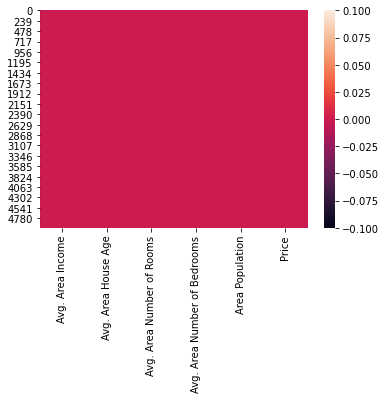

In [4]:
sns.heatmap(data.isnull())

checking null value by using the codes..

In [5]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

checking correration..

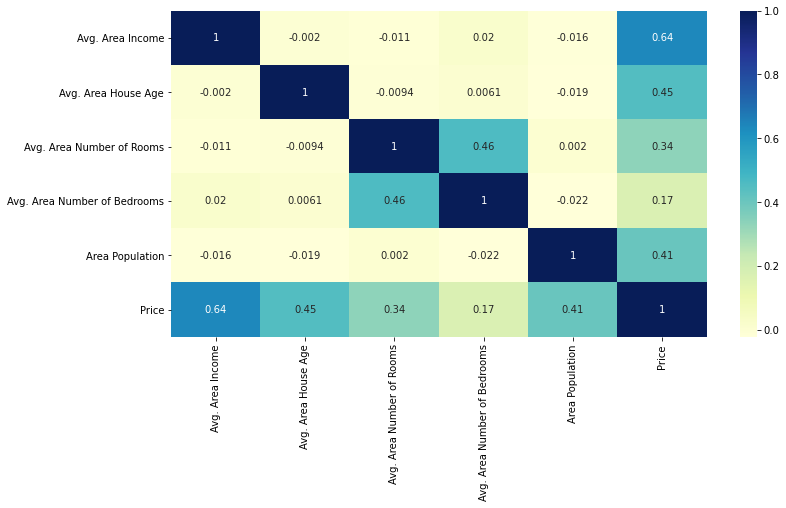

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu')
plt.show()

Train test split

In [7]:
X = data.drop('Price', axis=1)
Y = data['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30)

Training and predicting.

In [8]:
model = LinearRegression()
trained_model = model.fit(X_train,Y_train)

In [9]:
predictions = trained_model.predict(X_test)
predictions

array([1536026.13773855,  850912.81308565, 1376702.62135531, ...,
        525764.26342183, 1079973.02327066,  925905.88024487])

Evaluation

In [10]:
error = np.sqrt(metrics.mean_absolute_error(Y_test, predictions))
error

284.7124476962805

Checking the model accuracy... and fitness.

In [11]:
trained_model

LinearRegression()

SAVING THE PREDICTION MODEL FILE. FOR HOUSE PRICE PREDICTION.

In [12]:
import pickle

filename = 'my_model.pkl'
pickle.dump(trained_model, open(filename,'wb'))

# pickle.dump(trained_model, open('my_model.pkl', 'wb'))

In [13]:
my_model_load = pickle.load(open(filename, 'rb'))
predict_result = my_model_load.predict(X_test)

In [14]:
predict_result

array([1536026.13773855,  850912.81308565, 1376702.62135531, ...,
        525764.26342183, 1079973.02327066,  925905.88024487])